# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [101]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as scipy
import scipy.stats as stats
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [3]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head(10)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [4]:
df.shape

(400, 4)

In [9]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [12]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [13]:
df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

Answer: 400

> ### Question 2.  Create a summary table.

In [6]:
df.describe()

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [22]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: gre and gpa are denominated in hundreds and ones, respectively; larger variance also indicates that numbers in the gre set are far from the mean and each other, while a gpa's small variance indicates the opposite

> ### Question 4.  Drop data points with missing data.

In [23]:
df.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [25]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [31]:
df.dropna().shape[0]

397

In [35]:
df.shape

(400, 4)

# Not dropped yet

In [38]:
df.dropna(inplace = True)

In [40]:
df.shape

(397, 4)

Answer: dropped after inplace - shape matches with the number of non-na

> ### Question 6.  Create boxplots for `gre` and `gpa`.

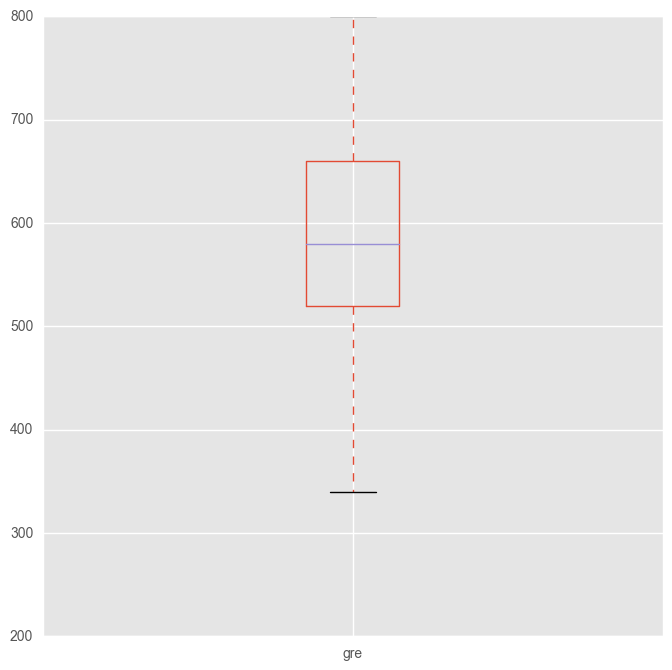

In [14]:
df[ ['gre'] ].plot(kind = 'box', figsize = (8, 8))

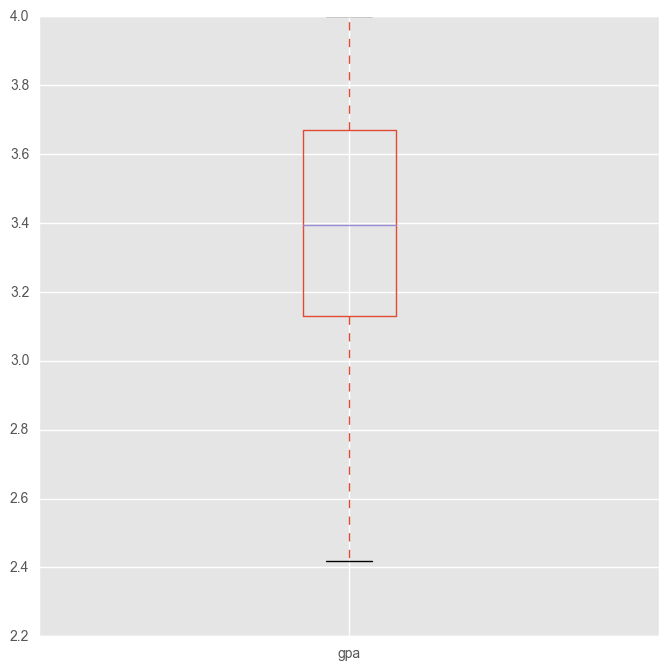

In [15]:
df[ ['gpa'] ].plot(kind = 'box', figsize = (8, 8))

> ### Question 7.  What do boxplots show?

Answer: GRE has distribution that's tilted right; GRA had a distribution that's tileted to the right

> ### Question 8.  Plot the distribution of each variable.

In [43]:
df.gre.value_counts(dropna = False).sort_index()

220.0     1
300.0     3
340.0     4
360.0     4
380.0     8
         ..
720.0    11
740.0    11
760.0     5
780.0     5
800.0    25
Name: gre, dtype: int64

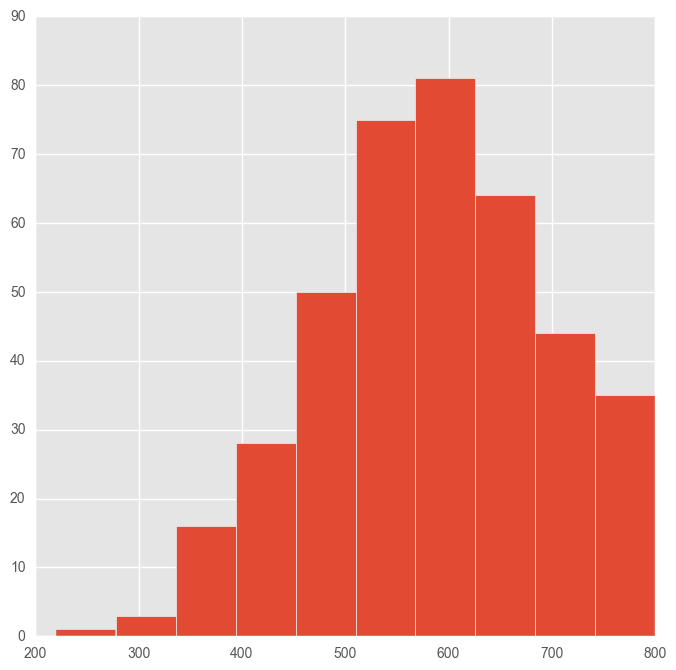

In [53]:
df.gre.hist(figsize = (8, 8))

In [54]:
df.gpa.value_counts(dropna = False).sort_index()

2.26     1
2.42     2
2.48     1
2.52     1
2.55     1
        ..
3.95     5
3.97     1
3.98     1
3.99     3
4.00    28
Name: gpa, dtype: int64

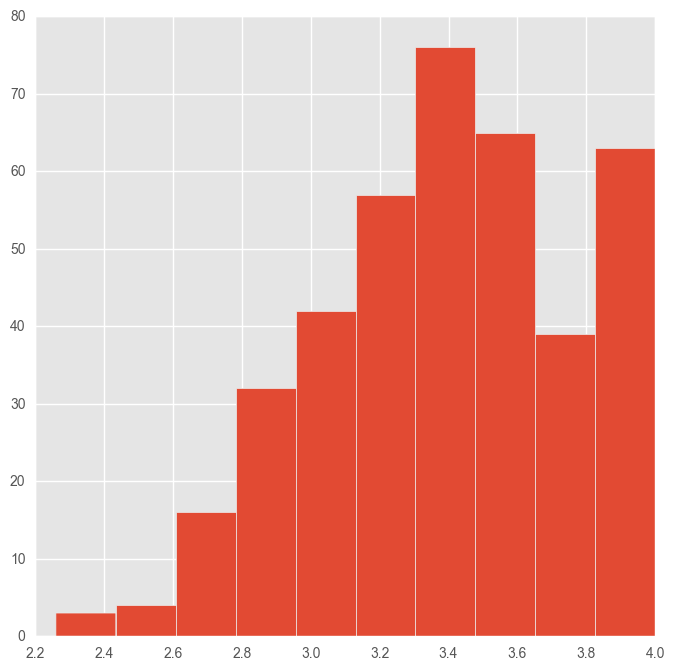

In [55]:
df.gpa.hist(figsize = (8, 8))

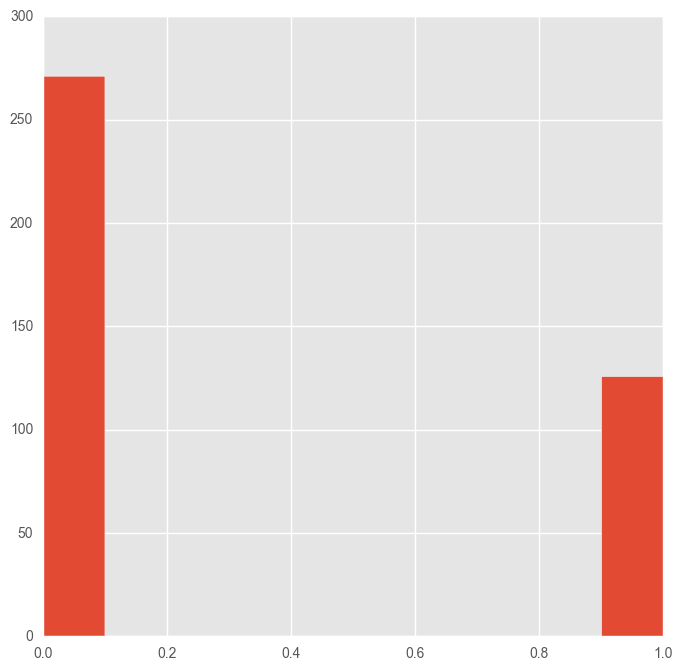

In [56]:
df.admit.hist(figsize = (8, 8))

In [57]:
df.admit.value_counts(dropna = False).sort_index()

0    271
1    126
Name: admit, dtype: int64

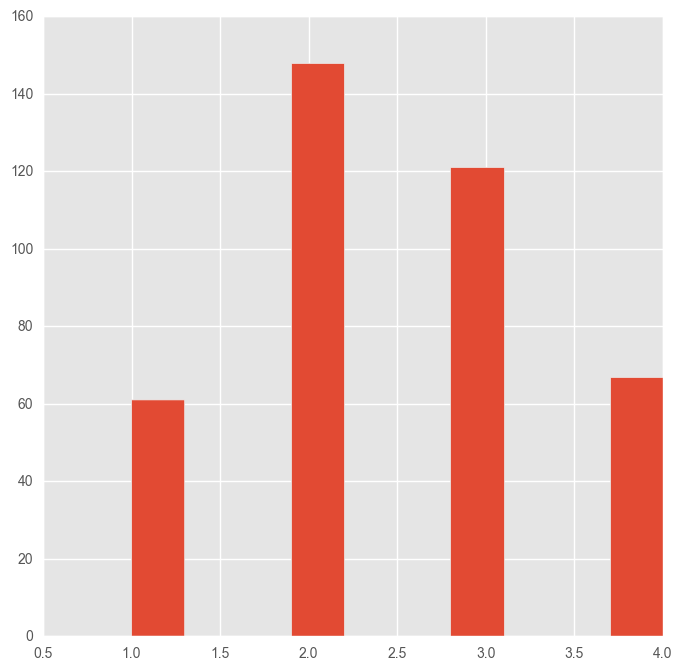

In [59]:
df.prestige.hist(figsize = (8, 8))

In [60]:
df.prestige.value_counts(dropna = False).sort_index()

1.0     61
2.0    148
3.0    121
4.0     67
Name: prestige, dtype: int64

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [97]:
print "For normally distributed data:"
for z in [1, 1.65, 2, 3]:
    print "\t- {:3.2f}% of it is between +/- {:1.2f} sigma(s)".\
        format((stats.norm.cdf(z) - stats.norm.cdf(-z)) * 100, z)

For normally distributed data:
	- 68.27% of it is between +/- 1.00 sigma(s)
	- 90.11% of it is between +/- 1.65 sigma(s)
	- 95.45% of it is between +/- 2.00 sigma(s)
	- 99.73% of it is between +/- 3.00 sigma(s)


In [124]:
pd.gre.(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

SyntaxError: invalid syntax (<ipython-input-124-d62a7952dc46>, line 1)

Answer: neither gre nor gpa are normally distributed; they would not need a correction because there are no significant outliers

> ### Question 10.  Create a correlation matrix for the dataset

In [61]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: gre and gpa might be slightly colinear; prestige and admit might be negatively correlated (if admitted - admit: 1 - then school is more prestigios - closer to prestige: 1) 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: normalize admit so it can be correlated with prestige; check colinearity; estimate a simple linear regression between prestige (explanatory variable) and admit (response variable); check coef, p-val, R

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011D22A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011FCAEF0>]], dtype=object)

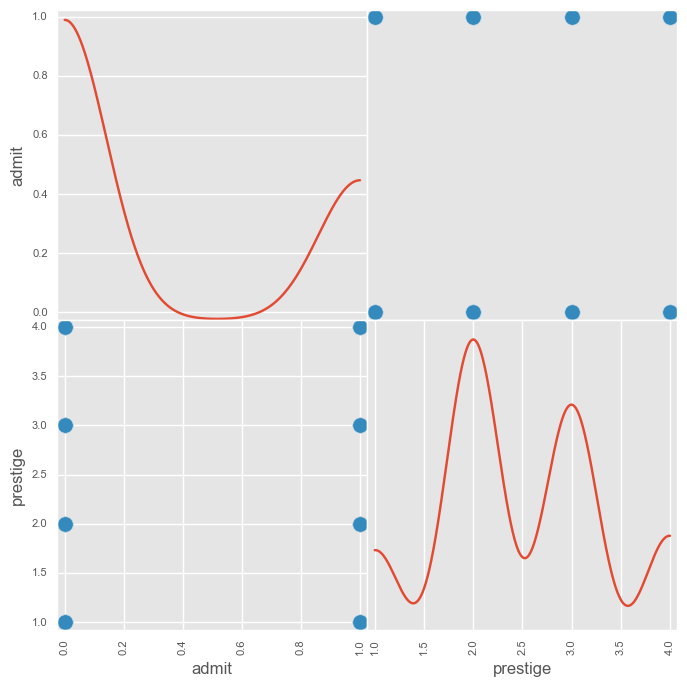

In [75]:
pd.tools.plotting.scatter_matrix(df[ ['admit', 'prestige'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

In [71]:
smf.ols(formula = 'admit ~ prestige', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Thu, 19 Jan 2017   Prob (F-statistic):           9.02e-07
Time:                        21:54:41   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000         0.490     0.741
prestige      -0.1199      0.024     -4.991      0.000        -0.167    -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Question 13.  What is your hypothesis?

Answer: if admitted ( admit: 1) then school is more prestigious ( prestige => 1) 